# IMDB Movie Scoring and Sorting

In [1]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import math
import matplotlib.pyplot as plt

# measurement methods
from sklearn.preprocessing import MinMaxScaler

# visualization
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
sns.set(rc={"figure.figsize":(12,12)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("datas/movies_metadata.csv")
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
data = data[["title","vote_average","vote_count"]]
data.head()

,title,vote_average,vote_count
0,Toy Story,7.7,5415.0
1,Jumanji,6.9,2413.0
2,Grumpier Old Men,6.5,92.0
3,Waiting to Exhale,6.1,34.0
4,Father of the Bride Part II,5.7,173.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         45460 non-null  object 
 1   vote_average  45460 non-null  float64
 2   vote_count    45460 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.0+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
vote_average,45460.0,5.618207,1.924216,0.0,5.0,6.0,6.8,10.0
vote_count,45460.0,109.897338,491.310374,0.0,3.0,10.0,34.0,14075.0


In [6]:
data.sort_values("vote_average", ascending=False).head(20)

,title,vote_average,vote_count
21642,Ice Age Columbus: Who Were the First Americans?,10.0,1.0
15710,If God Is Willing and da Creek Don't Rise,10.0,1.0
22396,Meat the Truth,10.0,1.0
22395,Marvin Hamlisch: What He Did For Love,10.0,1.0
35343,Elaine Stritch: At Liberty,10.0,1.0
186,Reckless,10.0,1.0
45047,The Human Surge,10.0,1.0
22377,The Guide,10.0,1.0
22346,هیچ کجا هیچ کس,10.0,1.0
1634,Other Voices Other Rooms,10.0,1.0


Even tough the vote average is high most of them have fewer vote counts which makes no justice for social proof. Therefore, a **threshold** for *vote_count* will be applied.

In [7]:
# checking the quantiles for the movies 

data["vote_count"].describe([0.10, 0.25, 0.50, 0.75, 0.85, 0.95, 0.99]).T

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
10%          1.000000
25%          3.000000
50%         10.000000
75%         34.000000
85%         82.000000
95%        434.000000
99%       2183.820000
max      14075.000000
Name: vote_count, dtype: float64

In [8]:
# adjusting the threshold after checking the quantiles since std is around 500

data[data["vote_count"] > 400].sort_values("vote_average", ascending=False).head(20)

,title,vote_average,vote_count
10309,Dilwale Dulhania Le Jayenge,9.1,661.0
40251,Your Name.,8.5,1030.0
834,The Godfather,8.5,6024.0
314,The Shawshank Redemption,8.5,8358.0
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0
1176,Psycho,8.3,2405.0
1178,The Godfather: Part II,8.3,3418.0
292,Pulp Fiction,8.3,8670.0
1184,Once Upon a Time in America,8.3,1104.0
5481,Spirited Away,8.3,3968.0


This also did not give any logical results since adjusting a threshold like this is not really secure. Therefore, *measurement methods* will be applied here.

In [9]:
# apply MinMaxScaler to standardize it

data["vote_count_score"] = MinMaxScaler(feature_range=(1,10)).fit(data[["vote_count"]]).transform(data[["vote_count"]])

data["average_count_score"] = data["vote_count_score"] * data["vote_average"]

In [10]:
data.sort_values("average_count_score", ascending=False).head(20)

,title,vote_average,vote_count,vote_count_score,average_count_score
15480,Inception,8.1,14075.0,10.000000,81.000000
12481,The Dark Knight,8.3,12269.0,8.845187,73.415048
22879,Interstellar,8.1,11187.0,8.153321,66.041904
17818,The Avengers,7.4,12000.0,8.673179,64.181528
14551,Avatar,7.2,12114.0,8.746075,62.971737
26564,Deadpool,7.4,11444.0,8.317655,61.550650
2843,Fight Club,8.3,9678.0,7.188419,59.663879
20051,Django Unchained,7.8,10297.0,7.584227,59.156973
23753,Guardians of the Galaxy,7.9,10014.0,7.403268,58.485819
292,Pulp Fiction,8.3,8670.0,6.543872,54.314139


# IMDB Weighted Rating

Instead of releasing raw data averages, IMDb publishes weighted vote averages. The easiest way to put it is that while all user votes are acknowledged and taken into account, not all votes have the same influence (or "weight"") on the final ranking.

To keep the system's dependability when atypical voting behavior is identified, a new weighting calculation might be used. The precise process utilized to obtain the rating is not released in order to maintain the effectiveness of the rating mechanism.

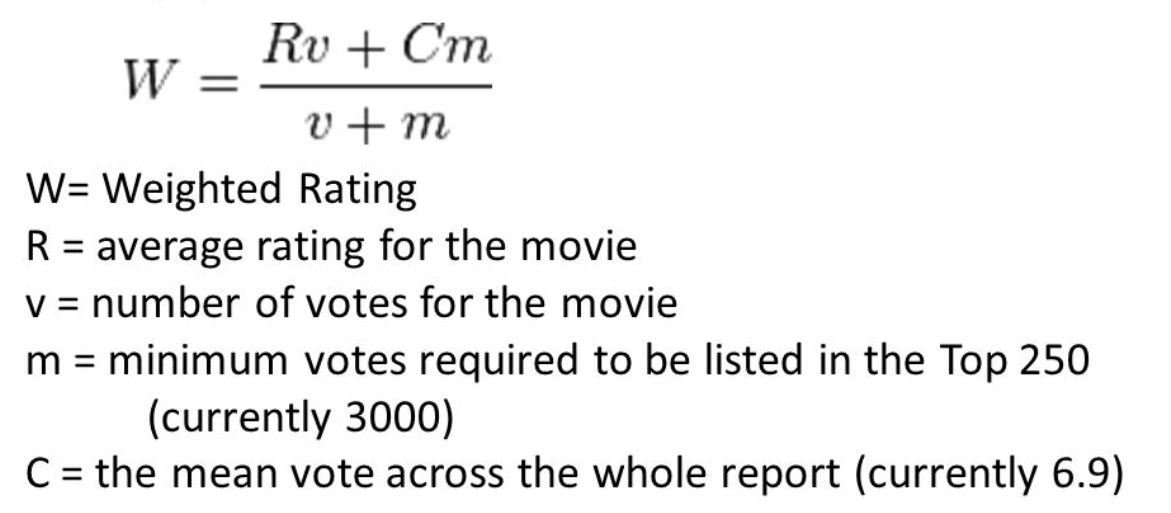

In [11]:
def weighted_rating(R,v,m,C):
    
    return ((R*v) + (C*m)) / (v+m)

Own calculated weighted movie list has **Inception**, **The Dark Knight**, **Interstellar**, **The Avengers** and **Avatar** as a first five rated movie.

In [12]:
# score calculation for Deadpool movie
m = 2500
C = data["vote_average"].mean()

weighted_rating(7.4, 11444.0, m, C)

7.080544896574546

In [13]:
data["weighted_rating"] = weighted_rating(data["vote_average"],
                                         data["vote_count"], m,C)

In [14]:
# now sort according to this calculated weighted rate feature

data.sort_values("weighted_rating", ascending=False).head(20)

,title,vote_average,vote_count,vote_count_score,average_count_score,weighted_rating
12481,The Dark Knight,8.3,12269.0,8.845187,73.415048,7.846044
314,The Shawshank Redemption,8.5,8358.0,6.344369,53.927140,7.836482
2843,Fight Club,8.3,9678.0,7.188419,59.663879,7.749460
15480,Inception,8.1,14075.0,10.000000,81.000000,7.725672
292,Pulp Fiction,8.3,8670.0,6.543872,54.314139,7.699778
834,The Godfather,8.5,6024.0,4.851936,41.241456,7.654800
22879,Interstellar,8.1,11187.0,8.153321,66.041904,7.646688
351,Forrest Gump,8.2,8147.0,6.209449,50.917485,7.593775
7000,The Lord of the Rings: The Return of the King,8.1,8226.0,6.259964,50.705712,7.521547
4863,The Lord of the Rings: The Fellowship of the Ring,8.0,8892.0,6.685826,53.486607,7.477310


# BAR Score

In [15]:
def bayesian_average_rating(n, confidence=0.95):
    
    if sum(n) == 0:
        return 0
    
    K = len(n)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    N = sum(n)
    
    first_part = 0.0
    second_part = 0.0
    
    for k,n_k in enumerate(n):
        first_part += (k+1) * (n[k] + 1) / (N+K)
        second_part += (k+1) * (k+1) * (n[k] + 1) / (N+K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N+K+1))
    
    return score

In [16]:
rating_data = pd.read_csv("datas/imdb_ratings.csv")
rating_data.head(10)

,Unnamed: 0,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one
0,0,111161,1. The Shawshank Redemption (1994),9.2,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733
1,1,68646,2. The Godfather (1972),9.1,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128
2,2,71562,3. The Godfather: Part II (1974),9.0,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469
3,3,468569,4. The Dark Knight (2008),9.0,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345
4,4,50083,5. 12 Angry Men (1957),8.9,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318
5,5,108052,6. Schindler's List (1993),8.9,453906,383584,220586,82367,27219,12922,6234,4572,4289,19328
6,6,167260,7. The Lord of the Rings: The Return of ...,8.9,703093,433087,270113,117411,44760,21818,10873,7987,6554,28990
7,7,110912,8. Pulp Fiction (1994),8.8,674884,541946,332876,140886,52091,26828,14203,10425,8912,25610
8,8,60196,"9. Il buono, il brutto, il cattivo (1966)",8.8,246549,199725,138309,58595,18777,8607,3903,2451,2032,10319
9,9,120737,10. The Lord of the Rings: The Fellowshi...,8.8,631020,460809,316221,132929,46699,22658,11002,8295,6911,27013


In [17]:
# The Shawshank Redemption

bayesian_average_rating([34733,4355,4704,6561,26184,87368,273091,600284,1295382])

8.19117959854753

In [18]:
# The Godfather (1972)
bayesian_average_rating([37128,5879,6268,8419,16603,30016,78541,199440,402527,837932])

8.940015901285134

In [19]:
rating_data["bar_score"] = rating_data.apply(lambda x: bayesian_average_rating(x[["one","two","three","four","five",
                                                                    "six","seven","eight","nine","ten"]]),axis=1)

In [21]:
rating_data.sort_values("bar_score", ascending=False).head(10)

,Unnamed: 0,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one,bar_score
0,0,111161,1. The Shawshank Redemption (1994),9.2,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733,9.145389
1,1,68646,2. The Godfather (1972),9.1,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128,8.940016
3,3,468569,4. The Dark Knight (2008),9.0,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345,8.895962
2,2,71562,3. The Godfather: Part II (1974),9.0,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469,8.812499
4,4,50083,5. 12 Angry Men (1957),8.9,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318,8.767934
6,6,167260,7. The Lord of the Rings: The Return of ...,8.9,703093,433087,270113,117411,44760,21818,10873,7987,6554,28990,8.752038
5,5,108052,6. Schindler's List (1993),8.9,453906,383584,220586,82367,27219,12922,6234,4572,4289,19328,8.743609
11,11,109830,12. Forrest Gump (1994),8.8,622104,553654,373644,151284,51140,22720,11692,7647,5941,12110,8.699152
12,12,1375666,13. Inception (2010),8.7,724798,627987,408686,174229,60668,26910,13436,8703,6932,17621,8.693148
10,10,137523,11. Fight Club (1999),8.8,637087,572654,371752,152295,53059,24755,12648,8606,6948,17435,8.674475


### Actual IMDB List

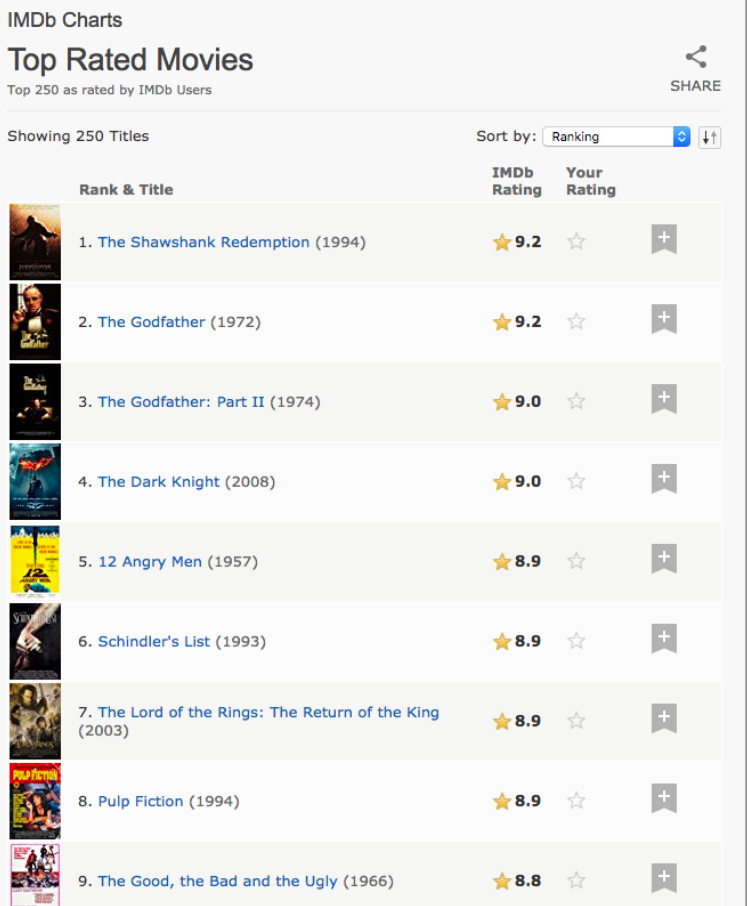